## Dzisiejszy temat
Hurra, kolejne zajęcia! 
Dzisiaj dowiecie się więcej o ICA oraz nauczycie się liczyć i porównywać potencjały wywołane - ERPy.

## rozgrzewka
Jak zwykle - upewnijcie się, że wszytko Wam działa - korzystamy z tych samych danych, co na ostatnich zajęciach.
Krok pierwszy to stosunkowo proste ćwiczenie dla Was - musicie dokonać preprocessing'u pliku. Może brzmi to strasznie
ale robiliście to już na ostatnich zajęciach w notebook'u [`EEG01/zajecia_04/zajecia_04.ipynb`](https://github.com/mmagnuski/EEG01/blob/master/zajecia_04/zajecia_04.ipynb).
Przypominam podstawowe kroki:
* wczytanie pliku (w Waszym wypadku - wczytujecie przygotowany przeze mnie plik `*.fif` - tak jak na ostatnich zajęciach)
* filtrowanie (to już jest zrobione dla tego pliku)
* zaznaczenie artefaktów (to też jest zrobione)
* wczytanie pozycji elektrod (nie potrzebujecie rysować do tego wykresów)
* wczytujecie eventy z kanałów DIN i usuwacie te kanały (tu też nie potrzebujecie tych wszystkich plotów co ostatnio)
* tworzycie epoki  

Musicie zidentyfikować komendy odpowiadające tym krokom w poprzednim notebook'u i wykonać je tutaj.
Zauważycie wtedy że tych komend wcale nie jest tak dużo - każdy krok to 1 - 2 komendy. W związku z tym na to zadanie macie ok 15 minut.

In [ ]:
# tutaj możesz wrzucić komendy
# pamiętaj, że możesz tworzyć nowe komórki z menu insert
# z niebieskiego trybu możecie też tworzyć nową pustą komórkę poniżej
# za pomocą klawisza 'b' (od below) oraz nową pustą komórkę powyżej
# obecnej za pomocą klawisza 'a' (od above)

Gdy już przeprowadzicie te kroki zastosujcie referencję do średniej (napięcie to zawsze różnica potencjałów, więc zawsze mierzymy napięcie EEG względem jakiejś referencji) czyli zamiast konkretnej elektrody referencyjnej Waszą referencją będzie średnia ze wszystkich elektrod:

In [11]:
# ustawiamy referencję - gdy nie podamy żadnych argumentów
# zostanie ustawiona średnia referencja
epoki.set_eeg_reference()

# stosujemy tę referencję (to jest krok specyficzny dla mne 
#                          - nie trzeba go robić w innych bibliotekach
#                          takich jak fieldtrip, eeglab czy brainstorm)
epoki.apply_proj()

Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


<Epochs  |  n_events : 404 (all good), tmin : -0.2 (s), tmax : 0.5 (s), baseline : (None, 0), ~35.4 MB, data loaded,
 '36': 67, '40': 68, '44': 66, '52': 67, '56': 68, '60': 68>

## ICA
czas zająć się ICA i wyczyścić dobrze te dane.

In [12]:
from mne.preprocessing import ICA

In [16]:
# tworzymy sobie obiekt ica - z konfiguracją jaką chcemy mieć
ica = ICA(method='extended-infomax', n_components=0.99)
print(ica)

<ICA  |  no decomposition, fit (extended-infomax):  samples, no dimension reduction>


In [17]:
# stosujemy teraz (dopasowujemy) ICA do danych, to chwilę potrwa:
ica.fit(epoki)

Fitting ICA to data using 65 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by explained variance: 39 components
computing Extended Infomax ICA


<ICA  |  epochs decomposition, fit (extended-infomax): 71104 samples, 39 components, channels used: "eeg">

In [18]:
# zobaczmy wszystkie komponenty, nie pokadjemy w związku z tym argumentu picks
# podajemy za to argument inst aby można było przeglądać panele komponentów
ica.plot_components(inst=epoki)

Poniżej kilka przykładów komponentów. W waszych danych kolejność komponentów może być inna (ICA jest niedeterministyczne - ale nie w filozoficznym sensie :) ). Używam poniżej z `plot_properties` (przy okazji pochwalę się Wam, że to funkcja, którą dodałem do mne - interakcję na kilkanie myszą w plot_components też :) ) ale tym razem podając indeksy konkretnych komponentów i trochę dodatkowych parametrów. Zachęcam do zajrzenia do dokumentacji tej funkcji. Na razie nie przejmujcie się argumentem `image_args=dict(sigma=2.5)`, w ten sposób kontroluję rozmycie w osi y na wykresie czas x epoki. O słownikach jeszcze sobie dziś opowiemy.

In [19]:
# uruchamiam tryb inline abyście widzieli w notebooku przykłady
# (wy nie musicie tego robić - możecie pominąć tę komórkę)
%matplotlib inline

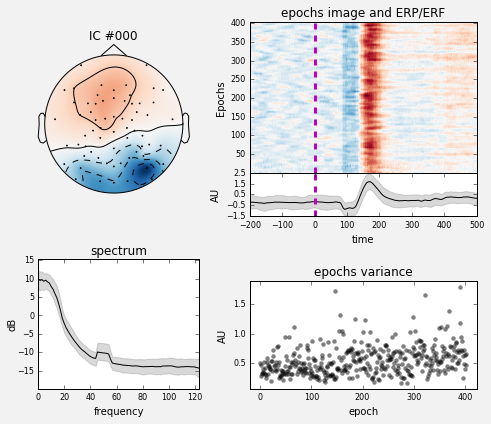

In [20]:
ica.plot_properties(picks=0, inst=epoki, image_args=dict(sigma=2.5))

Ten komponent powyżej to źródło mózgowe - widać to po topografii oraz przede wszystkim - po wyraźnej odpowiedzi na bodziec, bardzo powtarzalnej w kolejnych trialach.

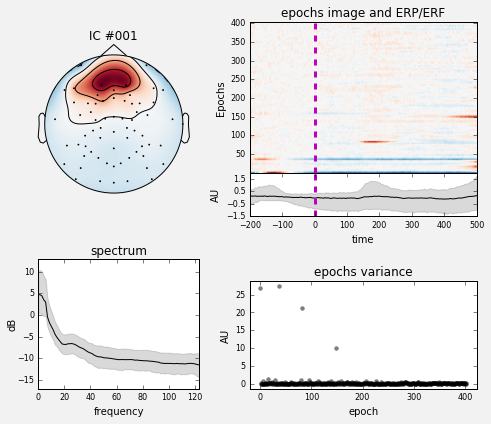

In [21]:
ica.plot_properties(picks=1, inst=epoki, image_args=dict(sigma=2.5))

Ten z kolei komponent (powyżej) to mruganie. Widzimy przede wszystkim po topografii, mapkach czas x epoki oraz wariancji sygnału komponentu dla poszczególnych epok (kilka bardzo odstających punktów).
Następny komponent natomiast to oscylacje alfa wygasające po prezentacji bodźca:

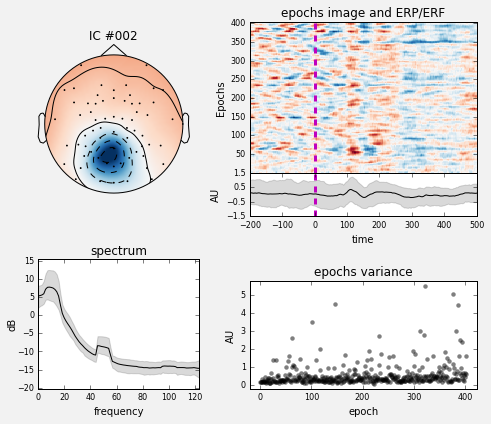

In [22]:
ica.plot_properties(picks=2, inst=epoki, image_args=dict(sigma=2.5))

Aby lepiej zrozumieć lepiej co i jak z komponentami otwieramy okienko z ich sygnałem (wy zróbcie to interaktywnie - nie inline). Możecie tam kilkać na nazwę komponentu po lewej aby pojawiła się jego mapka oraz na sygnał aby oznaczyć komponent jako do usunięcia.

In [23]:
%matplotlib

Using matplotlib backend: Qt5Agg


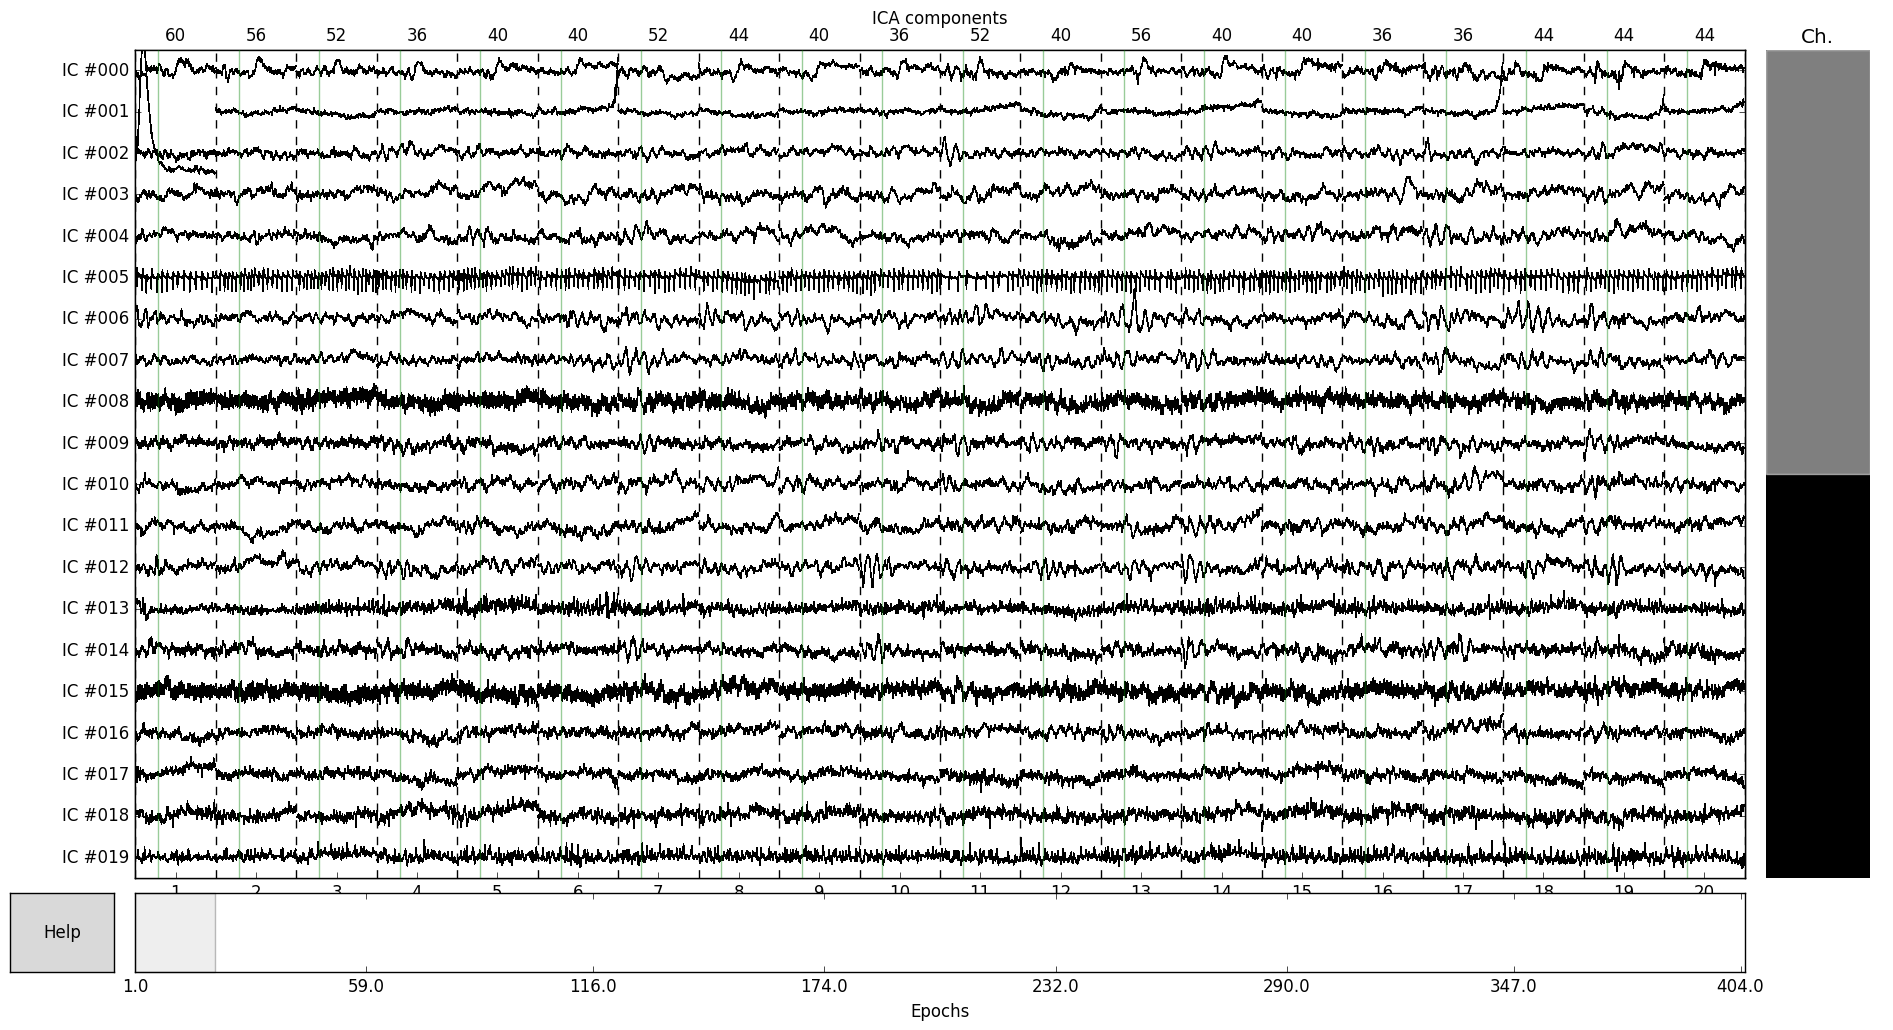

In [24]:
ica.plot_sources(epoki)

In [25]:
# poniżej wyświetlamy komponenty, które zaznaczyliśmy:
ica.exclude

[5, 1]

Transforming to ICA space (39 components)
Zeroing out 2 ICA components


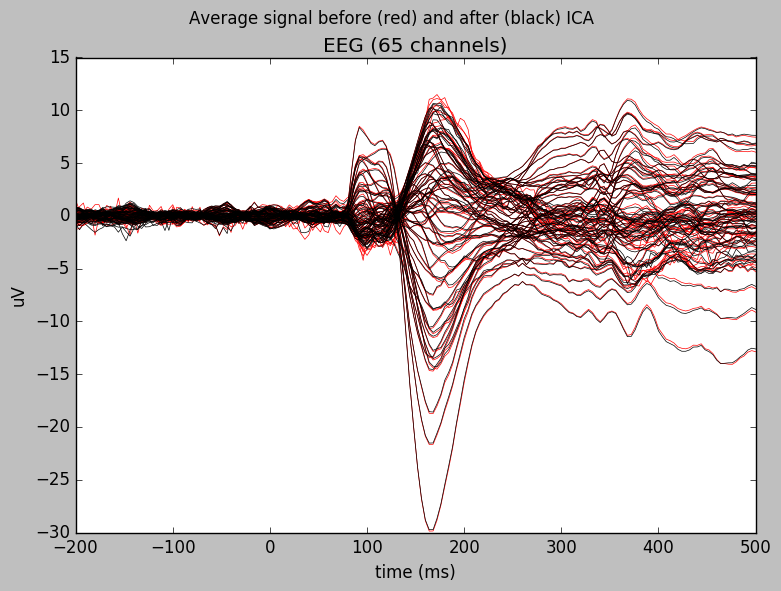

In [26]:
# teraz zobaczymy jak zmienia się sygnał gdy usuwamy te komponenty
# najpierw zrobimy sobie ERPa:
erp = epoki.average()

# teraz wyświetlimy jak sygnał erpa zmienia się po usunięciu ICA:
ica.plot_overlay(erp)

Mamy akurat bardzo czysty sygnał - osoba mruga tylko kilka razy, jest niewiele artefaktów. Ale usuniemy sobie komponenty z sygnału. Robimy `epoki.copy()` a nie `epoki` bo chcemy wyrzucić komponenty z kopii zmiennej `epoki` - tzn nie chcemy aby zmienna `epoki` się zmieniła.

In [27]:
epoki_czyste = ica.apply(epoki.copy())

Transforming to ICA space (39 components)
Zeroing out 2 ICA components


Ok, czas popatrzeć na ERPy, zobaczymy jak wyglądają średnie reakcje dla prezentacji twarzy prosto (`52`), samochodu prosto (`36`), twarzy do góry nogami (`60`) oraz samochodu do góry nogami (`44`). Najpierw zrobimy sobie erpa dla twarzy prosto i wyświetlimy go sobie:

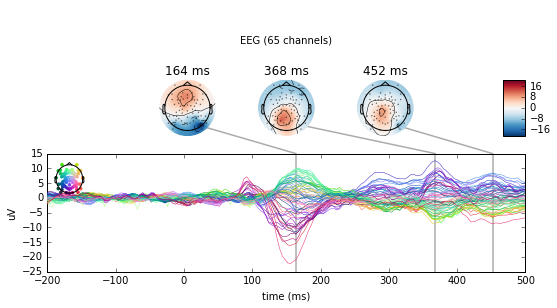

In [30]:
erp_twarz_prosto = epoki_czyste['52'].average()
erp_twarz_prosto.plot_joint();

Teraz zobaczmy na twarz do góry nogami:

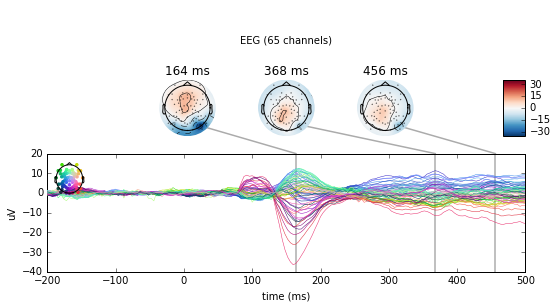

In [31]:
erp_twarz_odwrócona = epoki_czyste['60'].average()
erp_twarz_odwrócona.plot_joint();

Chcielibyśmy porównać sobie odpowiedź dla jednego i drugiego rodzaju bodźca,
ale obecnie nie jest to łatwe - mamy gąszcz elektrod na jednym i drugim wykresie.
Musimy wybrać sobie jakąś elektrodę. Zobaczmy najpierw na topografię efektu dla 160 ms
po prezentacji bodźca dla twarzy prosto:

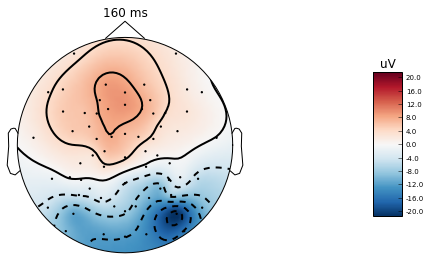

In [38]:
erp_twarz_prosto.plot_topomap(times=[0.16], size=4., contours=12);

Widzimy, że aktywność jest silna wokół jednej elektordy, znajdźmy ją sobie:

In [39]:
%matplotlib

Using matplotlib backend: Qt5Agg


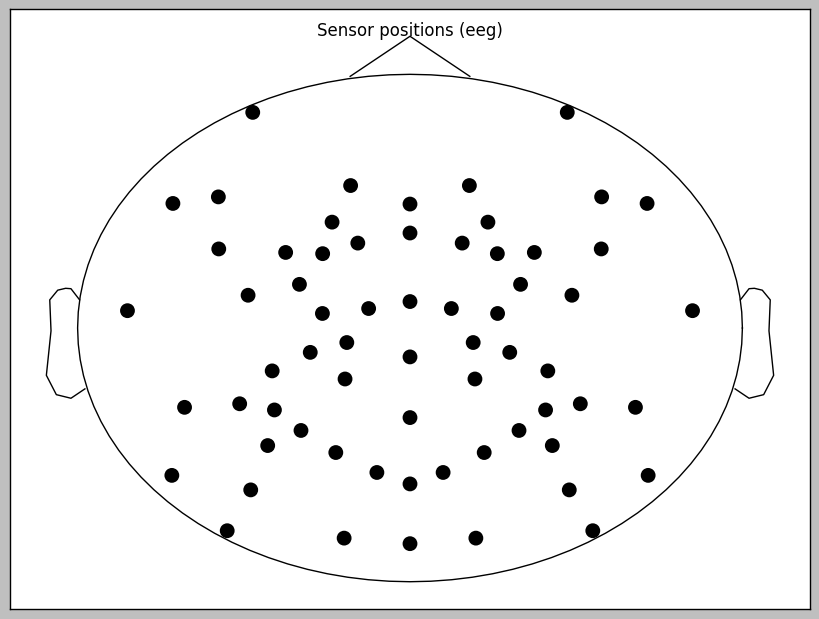

In [40]:
erp_twarz_prosto.plot_sensors()

Na moje oko wychodzi, że to elektroda "E44". Musimy jeszcze sprawdzić, która w kolejności jest ta elektroda w danych.
Skorzystamy do tego z metody `index` jaką posiada każda lista. Poniżej przykład:

In [41]:
lisek = ['a', 'b', 'c', 'd']

# sprawdzamy które jest c:
które_jest_c = lisek.index('c')

print("c jest", które_jest_c, "w liście lisek")

c jest 2 w liście lisek


Jeżeli wyświetlony wynik was zaskoczył - sprawdźcie które będzie 'a'.
Listę nazw wszystkich elektrod mam w `ch_names` - znajdziecie ten atrybut zarówno w surowych danych, epokach jak i erpie:

In [43]:
print(erp_twarz_prosto.ch_names)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'Cz']


Wasze zadanie: użyjcie metody index na tej liście aby dowiedzieć się która jest elektroda `E44` w tej liście.
Wynik zapiszcie w zmiennej `ch_index`.

In [ ]:
# tutaj rozwiązanie

Nadeszła wielka chwila - porównamy sobie teraz jak wyglądają te erpy, skorzystamy z funkcji `plot_compare_evokeds` która znajduje się w `mne.viz` - to podmoduł mne do wizualizacji:

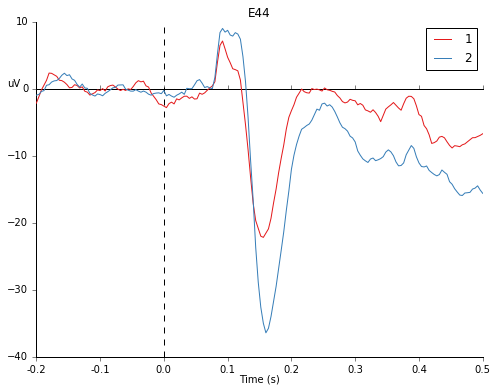

In [49]:
mne.viz.plot_compare_evokeds([erp_twarz_prosto, erp_twarz_odwrócona], picks=ch_index);

Ok, wszystko ładnie, ale co to jest 1 a co to jest 2?
Jako argument podaliśmy funkcji `plot_compare_evokeds` lisę erpów: `[erp_twarz_prosto, erp_twarz_odwrócona]`, więc funkcja nie wie jak nazwać te warunki. Podaje w związku z tym w legendzie ich kolejność (przy czym podaje to niepythonowo - pierwszy element ma indeks 1 a nie 0, można rozważyć aby to zmienić...). Jeżeli chcemy mieć wyświetlone nazwy warunków, musimy użyć słowników...

## Słow(n)iki
Słowniki, w więzieniu nazywany *Slow Niki*, wyszedł wrescie na wolność. Zaczyna życie od nowa - do czego przydadzą mu się pieniądze. Dlatego też siada do pythona i tworzy słownik opisujący kto ile wisi mu kasy. Wywrze nacisk na tych drani i będzie miał pieniądze na start. Może otworzy mały biznes, startup jakiś...

In [50]:
kto_ile_wisi = {'Jan K.': 2000, 'Andrzej D.': 5000, 'Piotr W.': 250.4}

Zauważcie jak definuje się słownik - korzystamy z nawiasów klamrowych ("wąsatych") `{` a następnie podajemy sekwencję:  
`klucz1: wartość1, klucz2: wartość2` itd.
Pytanie - po co to robimy? Teraz możemy dostawać się po kluczu łatwo do wartości:

In [51]:
kto_ile_wisi['Andrzej D.']

5000

Slow Niki nie musi już teraz teraz zajmować tym aby pamiętać wszystkich dłużników. Chodzi na spotkania z laptopem pod pachą - gdy spotyka znajomego sprawdza w pythonie czy przypadkiem nie powinien użyć wobec niego siły perswazji.

Nasze zastosowanie słownika będzie bardziej trywialne - jeżeli chcemy aby funkcja `plot_compare_evokeds` wyświetliła nam legendy musimy podać jej słownik w formacie:
* klucze - nazwy warunków
* wartości - odpowiadające warunkom erpy
To zadanie dla Was (**hurra!**) - stwórzcie taki słownik dla naszych dwóch erpów, ktore podawaliśmy do funkcji `plot_compare_evokeds`. Warunki możecie nazwać jak chcecie, ale słownik zapiszcie w zmiennej `nasze_kochane_erpy`.

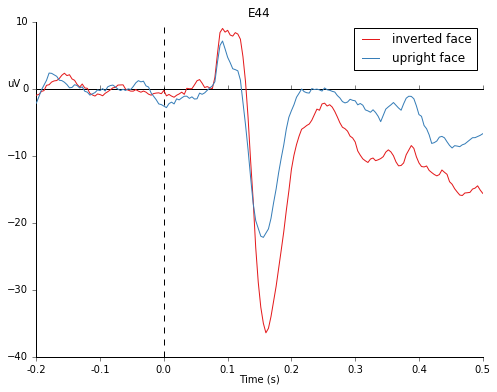

In [54]:
mne.viz.plot_compare_evokeds(nasze_kochane_erpy, picks=ch_index);

Jak już to zrobicie - kolejne zadania: 
* zróbcie to samo dla porównania twarz prosto vs samochód prosto
* oraz dla porównania samochód prosto vs samochód do góry kołami
* na koniec wybierzcie sobie 3 sąsiadujące ze sobą elektrody, sprawdźcie które sa w `ch_names` 
  i stwórzcie z tych indeksów listę. Tę listę podacie funkcji plotującej jako `picks` aby dostać
  erpa będącego średnią z erpów z wymienionych kanałów.

## Peakachu

Do tej pory robiliśmy to wszystko ręcznie sprawdzając jak wyglądają
mapki topograficzne wywołanych odpowiedzi i szukając elektrody, która
nas interesuje itp. Czas uprościć trochę nasze zmagania, powstań `Peakachu`!
`Peakachu` w odróżnieniu od Pikachu szuka elektrod, które mają najsilniejszą odpowiedź dla interesującego nas peaku.
Powiedzmy, że interesuje nas peak `N170` (negatywny, mniej więcej 170 ms po prezentacji bodźca):

In [55]:
from mypy.chans import Peakachu

In [58]:
pika = Peakachu(mode='N170', n_channels=1)
pika.fit(erp_twarz_prosto)

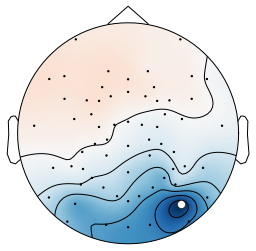

In [60]:
pika.plot_topomap();

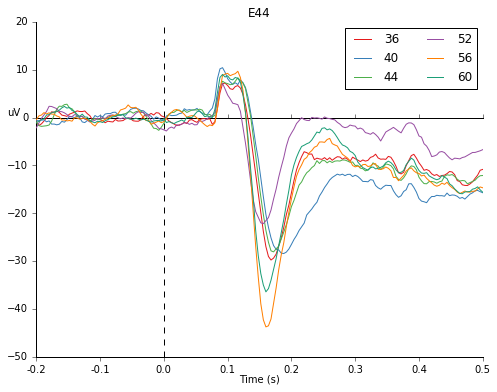

In [62]:
# widzimy wybrany przez peakachu kanał, możemy też zobaczyć porównanie wszystkich warunków:
pika.plot_erp(epoki_czyste);

In [64]:
# ale możemy też po prostu wyciągnąć od Peakachu, który wybrał kanał:
print("wybrany kanał to", pika._chan_names)
print("jego indeks to", pika._chan_ind)

wybrany kanał to ['E44']
jego indeks to [43]


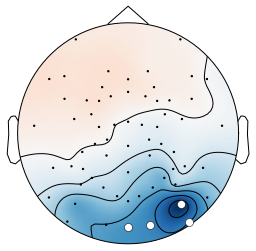

In [65]:
# ale może chcemy wybrać 4 kanały, nie jeden:
pika = Peakachu(mode='N170', n_channels=4)
pika.fit(erp_twarz_prosto)
pika.plot_topomap();

In [67]:
print("wybrane kanały to", pika._chan_names)
print("ich indeksy to", pika._chan_ind)

wybrane kanały to ['E37', 'E39', 'E43', 'E44']
ich indeksy to [36, 38, 42, 43]


## Różnica erpów

In [69]:
# możemy też zobaczyć jak wygląda różnica między dwoma erpami
# kombinujemy dwa erpy z wagami 1 i -1 co daje nam odjęcie drugiego od pierwszego:
erp_różnica = mne.combine_evoked([erp_twarz_odwrócona, erp_twarz_prosto], weights=[1, -1])

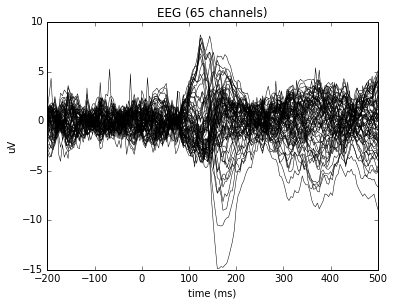

In [73]:
erp_różnica.plot();

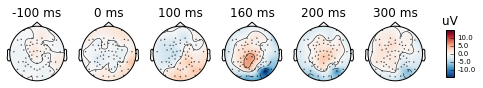

In [71]:
erp_różnica.plot_topomap(times=[-0.1, 0, 0.1, 0.16, 0.2, 0.3]);

## Podróż do źródeł
Pamiętacie pierwszy komponent, który mieliśmy w ica? To było silne źródło mózgowe pokazujące wyraźną reakcję na bodziec:

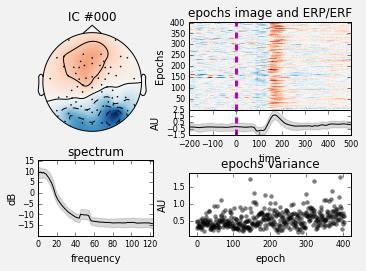

In [75]:
ica.plot_properties(epoki, picks=0, figsize=(5, 3.5))

Niesamowita wieść dla Was - możemy sobie wyciągnąć sygnał tego komponentu!

In [80]:
ica_sources = ica.get_sources(epoki)
print(ica_sources)

<Epochs  |  n_events : 404 (all good), tmin : -0.2 (s), tmax : 0.5 (s), baseline : (None, 0), ~21.2 MB, data loaded,
 '36': 67, '40': 68, '44': 66, '52': 67, '56': 68, '60': 68>


In [81]:
# mamy teraz takie epoki tylko, że elektrody to poszczególne komponenty:
ica_sources.ch_names[:5]

['ICA 001', 'ICA 002', 'ICA 003', 'ICA 004', 'ICA 005']

In [87]:
# wybieramy pierwszy 'kanał' (tzn. komponent) - chyba że u Was ten komponent nie był pierwszy.
# dodaję jeszcze apply_baseline aby średnia z sygnału przed prezentacją bodźca wynosiła 0
erp_src_f_0 = ica_sources['52'].average(picks=[0]).apply_baseline()
erp_src_f_180 = ica_sources['60'].average(picks=[0]).apply_baseline()

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


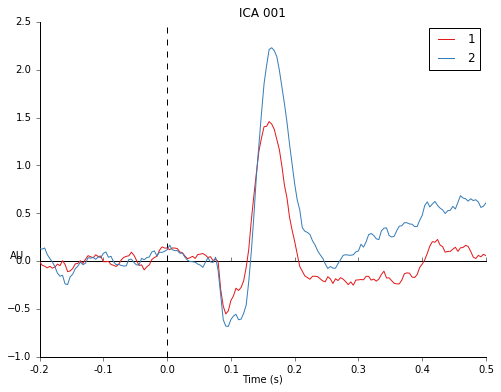

In [88]:
mne.viz.plot_compare_evokeds([erp_src_f_0, erp_src_f_180], picks=[0]);

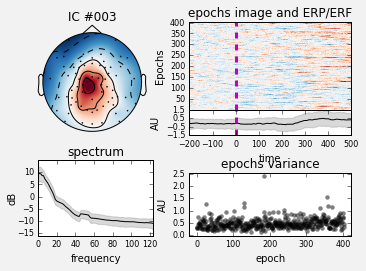

In [99]:
# inne źródło:
ica.plot_properties(epoki, picks=3, figsize=(5, 3.5))

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


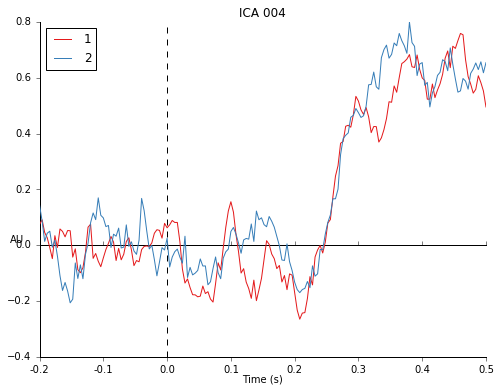

In [100]:
erp_src_f_0 = ica_sources['52'].average(picks=[3]).apply_baseline()
erp_src_f_180 = ica_sources['60'].average(picks=[3]).apply_baseline()
mne.viz.plot_compare_evokeds([erp_src_f_0, erp_src_f_180], picks=[0]);